In [1]:
import pandas as pd 
import math
import numpy as np 
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/XLDLTK/bank2.xls"

In [ ]:
from pandas import ExcelFile

In [61]:
#load data
def load_data(path):
    data = pd.read_excel(path,header = None)
    return data.iloc[1:,:]

In [ ]:
df = load_data('bank2.xls')
df

In [62]:
def matrix_dot(a, b):
    return [[sum(a[i][k] * b[k][j] for k in range(len(a[0]))) for j in range(len(b[0]))] for i in range(len(a))]
    
def matrix_sub(a, b):
    return [[a[i][j] - b[i][j] for j in range(len(a[0]))] for i in range(len(a))]

def matrix_transpose(a):
    return [[a[i][j] for i in range(len(a))] for j in range(len(a[0]))]
def matrix_shape(a):
    return (len(a), len(a[0]))
def matrix_divide(a, b):
    return [[a[i][j] / b for j in range(len(a[0]))] for i in range(len(a))]

In [63]:
def mean(A):
    return (1/len(A))*sum(A)


In [64]:
from scipy.linalg import eig

In [65]:
def sorts(A):
    n = len(A)
    for i in range(n):
      for j in range(0, n-i-1):
        if A[j] > A[j+1]:
            A[j], A[j+1] = A[j+1], A[j]
    return A

In [67]:
df = load_data('bank2.xls')
df

,0,1,2,3,4,5
1,214.8,131.0,131.1,9.0,9.7,141.0
2,214.6,129.7,129.7,8.1,9.5,141.7
3,214.8,129.7,129.7,8.7,9.6,142.2
4,214.8,129.7,129.6,7.5,10.4,142.0
5,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
196,215.0,130.4,130.3,9.9,12.1,139.6
197,215.1,130.3,129.9,10.3,11.5,139.7
198,214.8,130.3,130.4,10.6,11.1,140.0
199,214.7,130.7,130.8,11.2,11.2,139.4


In [68]:
mean_list = []
for i in range(col):
      mean_list.append([mean(df[i])])
h = [[1] for _ in range(row)]
h_dot_mu = matrix_dot(h,matrix_transpose(mean_list))
beta = matrix_sub(X,h_dot_mu)
cov = matrix_dot(matrix_transpose(beta),beta)
cov = matrix_divide(cov,row)

In [69]:
np.cov(np.array(X).T)

array([[ 0.14179296,  0.03144322,  0.02309146, -0.10324623, -0.0185407 ,
         0.08430553],
       [ 0.03144322,  0.13033945,  0.10842739,  0.21580276,  0.10503945,
        -0.20934196],
       [ 0.02309146,  0.10842739,  0.16327412,  0.28413191,  0.12999673,
        -0.2404701 ],
       [-0.10324623,  0.21580276,  0.28413191,  2.08687814,  0.16453894,
        -1.03699623],
       [-0.0185407 ,  0.10503945,  0.12999673,  0.16453894,  0.64472337,
        -0.54961482],
       [ 0.08430553, -0.20934196, -0.2404701 , -1.03699623, -0.54961482,
         1.32771633]])

In [70]:
print(cov)

[[0.14108399999999952, 0.03128600000000011, 0.022976000000000378, -0.10272999999999968, -0.018447999999999534, 0.08388399999999914], [0.03128600000000011, 0.12968775000000088, 0.10788525000000028, 0.21472374999999988, 0.1045142499999998, -0.20829524999999943], [0.022976000000000378, 0.10788525000000028, 0.1624577500000003, 0.2827112500000004, 0.12934675000000076, -0.23926775000000078], [-0.10272999999999968, 0.21472374999999988, 0.2827112500000004, 2.076443750000001, 0.16371624999999995, -1.0318112500000007], [-0.018447999999999534, 0.1045142499999998, 0.12934675000000076, 0.16371624999999995, 0.6414997499999999, -0.5468667499999996], [0.08388399999999914, -0.20829524999999943, -0.23926775000000078, -1.0318112500000007, -0.5468667499999996, 1.3210777499999975]]


In [71]:
def PCA(path,percent):
    # read data
    data = load_data(path)
    X = data.values.tolist()
    row, col = df.shape
    mean_list = []
    # calculate mean for each column
    for i in range(len(data.columns)):
      mean_list.append([mean(data[i])])
    h = [[1] for _ in range(row)]
    h_dot_mu = matrix_dot(h,matrix_transpose(mean_list))
    beta = matrix_sub(X,h_dot_mu)
    cov = matrix_dot(matrix_transpose(beta),beta)
    cov = matrix_divide(cov,row)
    # find eigenvector and eigenvalue
    values, vec = eig(cov)
    values = [float(values[i]) for i in range(len(values))]
    vec = vec.tolist()
    idx = [i for i in range(len(values))]
    idx.sort(key=lambda i: values[i], reverse=True)
    values = [values[i] for i in idx]
    vec = matrix_transpose(vec)
    vec = [vec[i] for i in idx]
    A = sum(values)
    sum_v = 0
    # reduce the number of dimensions such that keep the percentage of the information
    for i in range(col):
      sum_v += values[i]/A
      if sum_v >= percent:
        i= i+1
        break
    w = []
    for j in range(i):
      w.append(vec[j])
    return matrix_dot(beta,matrix_transpose(w))

In [72]:
PCA('bank2.xls','bank2',0.9)


C:\Users\vongv\AppData\Local\Temp\ipykernel_12908\2118154228.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  values = [float(values[i]) for i in range(len(values))]


[[-0.5496480988425536, 0.5063730063142358],
 [-2.01862924301286, 0.6612636373842902],
 [-1.835675461866609, 1.1753073385559958],
 [-2.494367239566002, -0.11889156338537055],
 [-0.7013228189219557, 3.194766676001647],
 [-0.845845967571434, 0.4824940167660161],
 [-2.156052598846291, 0.43851664360386133],
 [-2.5444184513254253, -0.5952925399344159],
 [-1.8017107347386991, -0.1554342567449014],
 [-0.3579458504927597, 0.36624770409208096],
 [-1.6549095130827776, -0.9502131778601833],
 [-2.4718746176380426, 0.036578902247742295],
 [-1.6531296066059236, -0.5333796718439907],
 [-2.0478561212041084, -0.48804205925168975],
 [-2.1210003161929043, -0.39183207439865086],
 [-1.2110265198520689, 1.934684020858239],
 [-1.8031603466489086, 0.47898167446133266],
 [-1.5388955842876442, 1.5768088511195248],
 [-2.0885299259338175, -1.1418280968400614],
 [-1.569832593946633, 0.6608124657308881],
 [-1.5643377563609542, 0.36191718034665593],
 [-1.7116139826862695, -0.0027743782093688774],
 [-1.298000801669052

In [73]:
import matplotlib.pyplot as plt

C:\Users\vongv\AppData\Local\Temp\ipykernel_12908\2118154228.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  values = [float(values[i]) for i in range(len(values))]


<function matplotlib.pyplot.show(close=None, block=None)>

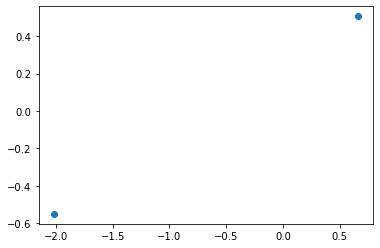

In [74]:
plt.scatter(PCA('bank2.xls','bank2',0.9)[1],PCA('bank2.xls','bank2',0.9)[0])
plt.show

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=2)

In [77]:
pca.fit_transform(np.array(X))

array([[-5.49648099e-01,  5.06373006e-01],
       [-2.01862924e+00,  6.61263637e-01],
       [-1.83567546e+00,  1.17530734e+00],
       [-2.49436724e+00, -1.18891563e-01],
       [-7.01322819e-01,  3.19476668e+00],
       [-8.45845968e-01,  4.82494017e-01],
       [-2.15605260e+00,  4.38516644e-01],
       [-2.54441845e+00, -5.95292540e-01],
       [-1.80171073e+00, -1.55434257e-01],
       [-3.57945850e-01,  3.66247704e-01],
       [-1.65490951e+00, -9.50213178e-01],
       [-2.47187462e+00,  3.65789022e-02],
       [-1.65312961e+00, -5.33379672e-01],
       [-2.04785612e+00, -4.88042059e-01],
       [-2.12100032e+00, -3.91832074e-01],
       [-1.21102652e+00,  1.93468402e+00],
       [-1.80316035e+00,  4.78981674e-01],
       [-1.53889558e+00,  1.57680885e+00],
       [-2.08852993e+00, -1.14182810e+00],
       [-1.56983259e+00,  6.60812466e-01],
       [-1.56433776e+00,  3.61917180e-01],
       [-1.71161398e+00, -2.77437821e-03],
       [-1.29800080e+00, -2.16283697e-01],
       [-1.

<function matplotlib.pyplot.show(close=None, block=None)>

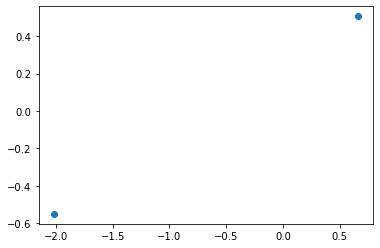

In [78]:
plt.scatter(pca.fit_transform(np.array(X))[1],pca.fit_transform(np.array(X))[0])
plt.show